<a href="https://colab.research.google.com/github/cdiegor/MineracaoDeDados/blob/main/Minera%C3%A7%C3%A3o_de_Dados_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

Quando o resultado, ou classe, é numérico e todos os atributos são numéricos, a regressão linear é uma técnica natural a ser considerada. Este é um método básico em estatística. A ideia é expressar a classe como uma combinação linear dos atributos, com pesos pré-determinados:

$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$

Os pesos são calculados a partir dos dados de treinamento. Aqui a notação fica um pouco pesada, pois precisamos de uma forma de expressar os valores dos atributos para cada instância de treinamento. Vamos utilizar $x_k^{(i)}$ como o valor do $k$-ésimo atributo da instância $i$. Além disso, é notacionalmente conveniente assumir um atributo extra $a_0$, cujo valor é sempre 1.

Portanto o valor previsto da classe pela instância $i$ é:

$y = \theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \cdots + \theta_n x_n^{(i)} = \sum \limits_{k=0}^{n} \theta_k x_k^{(i)}$

Contudo a própria instância $i$ traz um valor para a classe, $y^{(i)}$. Pode-se perceber a qualidade dos pesos calculados, portanto pela diferença entre a classe de fato e a classe prevista. 

O método de regressão linear de mínimos quadrados consiste em escolher os coeficientes $\theta_k$ - existem $n+1$ deles - para minimizar a soma dos quadrados dessas diferenças em todas as instâncias de treinamento. Suponha que existam $m$ instâncias de treinamento, então a soma dos quadrados das diferenças é:

$\sum \limits_{i=1}^{m} \left( y^{(i)} - \sum \limits_{k=0}^{n} \theta_k x_k^{(i)} \right)^2$

onde a expressão dentro dos parênteses é a diferença entre a classe real da $i$-ésima instância e sua classe prevista. Essa soma de quadrados é o que temos que minimizar escolhendo os coeficientes apropriadamente.

A regressão linear é um método excelente e simples de previsão numérica e tem sido amplamente utilizada em aplicações estatísticas há décadas. Claro, modelos lineares básicos sofrem da desvantagem de, bem, linearidade. Se os dados exibirem uma dependência não linear, a linha reta de melhor ajuste será encontrada, onde “melhor” é interpretado como a menor diferença média quadrática. Esta linha pode não se encaixar muito bem. No entanto, os modelos lineares servem bem como blocos de construção ou pontos de partida para métodos de aprendizado mais complexos.

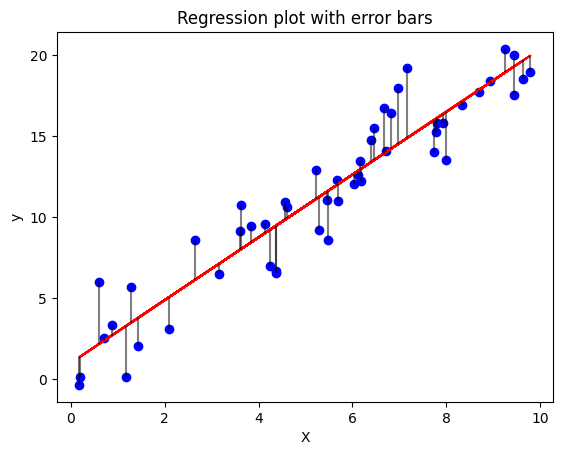

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(0)
X = np.random.uniform(low=0, high=10, size=50)
y = 2*X + 1 + np.random.normal(loc=0.0, scale=2.0, size=50)

# Fit a linear regression model
model = np.polyfit(X, y, 1)
predict = np.poly1d(model)

# Compute the predicted values and errors
y_pred = predict(X)
errors = abs(y - y_pred)/2

# Plot the data points and regression line with error bars
fig, ax = plt.subplots()
ax.scatter(X, y, color='blue')
ax.plot(X, predict(X), color='red')
ax.errorbar(X, (y+y_pred)/2, yerr=errors, fmt='none', color='black', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Regression plot with error bars')

plt.show()


## Estimando os coeficientes através do método de mínimos quadrados


Neste método queremos minimizar o erro quadrático do modelo gerado em relação às observações presentes no conjunto de treinamento. Vamos chamar o valor hipotético da classe de:

$
h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$
$

Como vimos anteiormente, cada instância $i = 1, \ldots, m$ produz um erro $ h_{\theta}(x^{(i)}) - y^{(i)}$ o qual gostaríamos de minimizar o quadrado, ou seja:

$
 \min \sum \limits_{i=1}^{m} ( h_{\theta}(x^{(i)}) - y^{(i)} )^2 = 2 \min \frac{1}{2}( h_{\theta}(x^{(i)}) - y^{(i)} )^2 = J(\theta)
$

Isto pode ser feito através de um processo de otimização iterativo que atualiza um vetor tentativa $\theta$ iterativamente até convergir para aquele que corresponde ao mínimo da expressão acima, na direção da derivada da função a ser otimizada.

$
 \theta_j \gets \theta_j - \alpha \frac{d}{d\theta_j} J(\theta)
$

onde o fator $\alpha$ é chamado de taxa de aprendizagem do modelo.



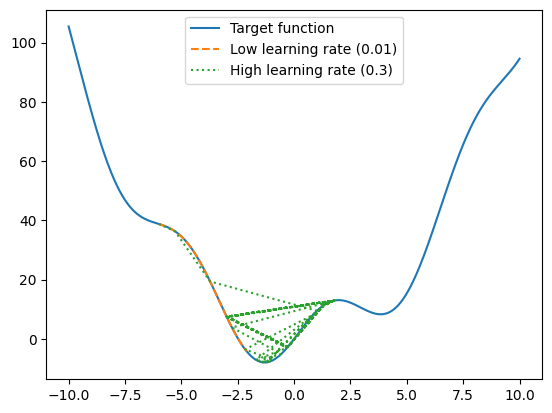

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target function and its gradient
def target_function(x):
    return x ** 2 + 10 * np.sin(x)

def gradient(x):
    return 2 * x + 10 * np.cos(x)

# Define the gradient descent function
def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x
    trajectory = [x]
    for i in range(num_iterations):
        gradient_value = gradient(x)
        x = x - learning_rate * gradient_value
        trajectory.append(x)
    return np.array(trajectory)

# Define the parameters for the gradient descent algorithm
initial_x = -6
num_iterations = 50

# Compute the trajectories for different learning rates
low_learning_rate = 0.01
high_learning_rate = 0.3
low_trajectory = gradient_descent(initial_x, low_learning_rate, num_iterations)
high_trajectory = gradient_descent(initial_x, high_learning_rate, num_iterations)

# Plot the target function and the trajectories for different learning rates
x = np.linspace(-10, 10, 1000)
y = target_function(x)
plt.plot(x, y, label='Target function')
plt.plot(low_trajectory, target_function(low_trajectory), label=f'Low learning rate ({low_learning_rate})', linestyle='--')
plt.plot(high_trajectory, target_function(high_trajectory), label=f'High learning rate ({high_learning_rate})', linestyle=':')
plt.legend()
plt.show()


Para concluirmos o método de descida do gradiente, vamos derivar a função $J(\theta)$.

$
    \begin{align*}
        \frac{d}{d\theta_j} J(\theta) & =  \frac{d}{d\theta_j} (h_{\theta}(x) - y)^2 \\
        & = 2 \cdot \frac{1}{2} (h_{\theta}(x) - y) \cdot \frac{d}{d\theta_j} (h_{\theta}(x) - y)\\
        & = (h_{\theta}(x) - y) \cdot \frac{d}{d\theta_j} (\sum_{k=1}^{n} \theta_k x_k - y)\\
        & = (h_{\theta}(x) - y) x_j
    \end{align*}
$

Com isso chegamos que a atualização necessária para cada componente $\theta_j$ é:

$
\theta_j \gets \theta_j + \alpha(y^i - h_{\theta}(x^i))x^i_j
$

O algoritmo consiste portanto em repetir estas atualizações até que se obtenha a convergência desejada.

Learned parameters: [0.32997311 2.05370832]
Final cost: 1.7960685231892126


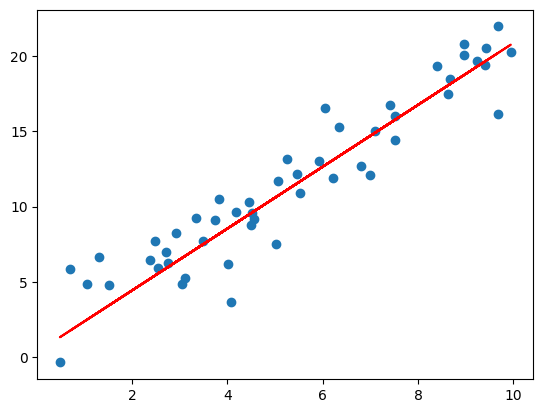

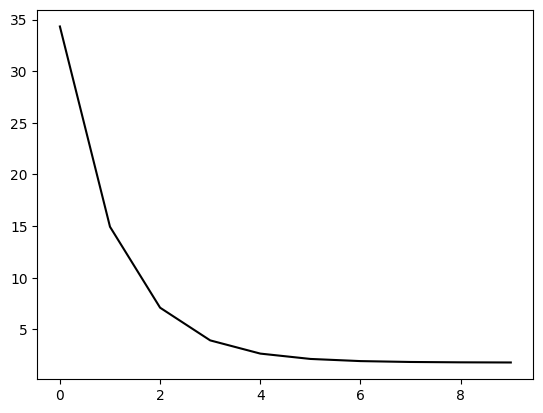

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
X = np.random.uniform(low=0, high=10, size=50)
y = 2*X + 1 + np.random.normal(loc=0.0, scale=2.0, size=50)

# Define the cost function (mean squared error)
def cost_function(x, y, theta):
    m = len(y)
    predictions = x.dot(theta)
    square_error = (predictions - y) ** 2
    cost = 1 / (2 * m) * np.sum(square_error)
    return cost

# Define the gradient descent function
def gradient_descent(x, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    for i in range(num_iterations):
        predictions = x.dot(theta)
        errors = predictions - y
        delta = 1 / m * x.T.dot(errors)
        theta = theta - alpha * delta
        cost_history[i] = cost_function(x, y, theta)
    return theta, cost_history

# Add a column of ones to x to represent the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Initialize the parameters and run the gradient descent algorithm
theta = np.zeros(X.shape[1])
alpha = 0.01
num_iterations = 10
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

# Print the learned parameters and the final cost
print(f'Learned parameters: {theta}')
print(f'Final cost: {cost_history[-1]}')

# Plot the data and the regression line
plt.scatter(X[:,1], y)
plt.plot(X[:,1], X.dot(theta), color='red')
plt.show()

# Plot the cost history
plt.plot(cost_history, color='black')
plt.show()


## Determinando a qualidade dos coeficientes

Em uma regressão linear simples, ou seja, com apenas um atributo preditor, podemos observar a influência do atributo sobre a classe apenas checando se $\theta_1 = 0$ ou $\theta_1 \neq 0$. Para uma regressão linear múltipla, com $n$ atributos, o que temos que observar é se algum atributo é diferente de zero.

Podemos elaborar um teste de hipótese neste caso:

$H_0: \theta_1 = \theta_2 = \ldots = \theta_n = 0$

contra a hipótese alternativa:

$H_a: ∃\ \theta_j \neq 0$

Este teste é realizado pela estatística $F$:

$
F =  \frac{ 
        \left( \sum\limits_{i=1}^m \bar y - y^{(i)} \right)^2 
      - \left( \sum\limits_{i=1}^m h_{\theta}x^{(i)} - y^{(i)} \right)^2}
      {n} \cdot
      \frac{m-n-1}{ \left( \sum\limits_{i=1}^m h_{\theta}x^{(i)} - y^{(i)} \right)^2} 
$

Se as hipóteses do modelo linear estiverem corretas é possível mostrar que:

$
E\left[ \frac{ \left( \sum\limits_{i=1}^m h_{\theta}x^{(i)} - y^{(i)} \right)^2 }{m-n-1} \right] = \sigma^2
$

E dado que a hipótese $H_0$ vale então:

$
E \left[ \frac{ 
        \left( \sum\limits_{i=1}^m \bar y - y^{(i)} \right)^2 
      - \left( \sum\limits_{i=1}^m h_{\theta}x^{(i)} - y^{(i)} \right)^2} {n}
  \right] = \sigma^2
$

Portanto, caso não haja influência dos atributos sobre a classe, esperamos qu essa estatística seja próxima de $1$. E caso a hipótese alternativa seja verdadeira esperamos que seja maior que $1$.

Este teste é especialmente útil quando temos um número pequeno de atributos. E certamente só é válido quando $n < m$ (de fato no caso contrário a regressão por mínimos quadrados nem sequer é indicada).

Individualmente, cada coeficiente também pode ser avaliado em sua importância. Neste caso a seguinte estatística-t:

$
t = \frac{\theta_j}{S_{\theta_j}}
$

pode indicar a importância do coeficiente $\theta_j$, através de seu valor-$p$, com m-n-1 graus de liberdade. De fato esta estatística define também um intervalo de confiança para o coeficiente $\theta_j$.



## Decidindo sobre variáveis importantes

Conforme discutido na seção anterior, o primeiro passo em uma regressão múltipla
análise é calcular a estatística $F$ e examinar o valor-$p$ associado. Se concluirmos com base nesse valor-$p$ que pelo menos um dos preditores está relacionado com a resposta, então é natural se perguntar quais são os culpados! 

É possível que todos os preditores estejam associados à resposta, mas é mais frequente que a resposta esteja associada apenas a um subconjunto dos preditores. A tarefa de determinar quais preditores são associados à resposta, a fim de ajustar um único modelo envolvendo apenas esses preditores, é referido como seleção de variável. Vamos esboçar algumas soluções clássicas.

Poderíamos começar com a ideia de tentar todos os subconjuntos de atributos, mas isso levaria a um exaustivo teste de $2^n$ modelos, o que se torna inviávels mesmo para valores moderados de $n$. De toda forma, caso seja possível, chamamos essa técnica de método força bruta.

Contudo as estratégias mais comuns envolvem passar apenas por um número limitado de modelos, incrementando ou decrementando os atributos. Em especial podemos citar:


*   **Seleção para frente**: Começamos com o modelo nulo - um modelo que contém uma interceptação, mas nenhum atributo. Em seguida, ajustamos n regressões lineares simples e adicionamos ao modelo nulo a variável que resulta no erro quadrático mais baixo. Em seguida, adicionamos a esse modelo a variável que resulta no menor erro quadrático para o novo modelo de duas variáveis. Esta abordagem continua até que alguma regra de parada seja satisfeita.
*   **Seleção para trás**: Começamos com todas as variáveis do modelo e removemos a variável com o maior valor-$p$, ou seja, a variável menos significativa estatisticamente. O novo modelo de $(p-1)$ variáveis é ajustado e a variável com o maior valor-$p$ é removida. Este procedimento continua até que uma regra de parada seja alcançada. Por exemplo, podemos parar quando todas as variáveis restantes tiverem um valor-$p$ abaixo de algum limite.
*   **Seleção mista**: Trata-se de mesclar os procedimentos de avançar e retroceder descritos anteriormente, até que algum critério de parada seja satisfeito.




In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load the Boston Housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


# create X and y matrices
X = pd.DataFrame(data)
X = sm.add_constant(X)  # add constant term
y = target

# backward selection with p-value analysis
cols = list(X.columns)
pmax = 1
while (len(cols) > 1):
    p = []
    X_1 = X[cols]
    model = sm.OLS(y,X_1).fit()
    print(model.summary())
    print()
    p = pd.Series(model.pvalues.values[1:], index=cols[1:])
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
# final model
selected_features_BE = cols
print('Selected features:', selected_features_BE)

# fit final model
#final_model = sm.OLS(y, X[selected_features_BE]).fit()

# print summary
#print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          6.72e-135
Time:                        17:36:56   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

## Extensões da regressão linear

O modelo de regressão linear padrão fornece resultados interpretáveis e funciona muito bem em muitos problemas do mundo real. No entanto, faz várias suposições altamente restritivas que muitas vezes são violadas na prática. Duas das suposições mais importantes afirmam que a relação entre os preditores e a resposta é aditiva e linear. A suposição de aditividade significa que a associação entre um preditor $x_j$ e a resposta $y$ não depende dos valores dos outros preditores. A suposição de linearidade afirma que a mudança na resposta $y$ associada a uma mudança de uma unidade em $x_j$ é constante, independentemente do valor de $x_j$ . Examinemos brevemente algumas abordagens clássicas para estender o modelo linear.

Ambas as restrições podem ser "burladas" pela adição de termos não lineares artificiais na tabela de entrada, ou seja, como novos atributos. A adição de atributos desta natureza, contudo pode acarretar em fenômenos correlatos que interferem na qualidade do modelo, tais como:

*   Não linearidade na relação classe-atributo
*   Correlação dos erros
*   Variação não-constante dos erros
*   *Outliers*
*   Instâncias altamente influentes
*   Colinearidade

Por outro lado a possibilidade de capturar fenômenos de forma mais apropriada, mais justa com a natureza do fenômeno, faz a popularidade do uso desta técnica.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


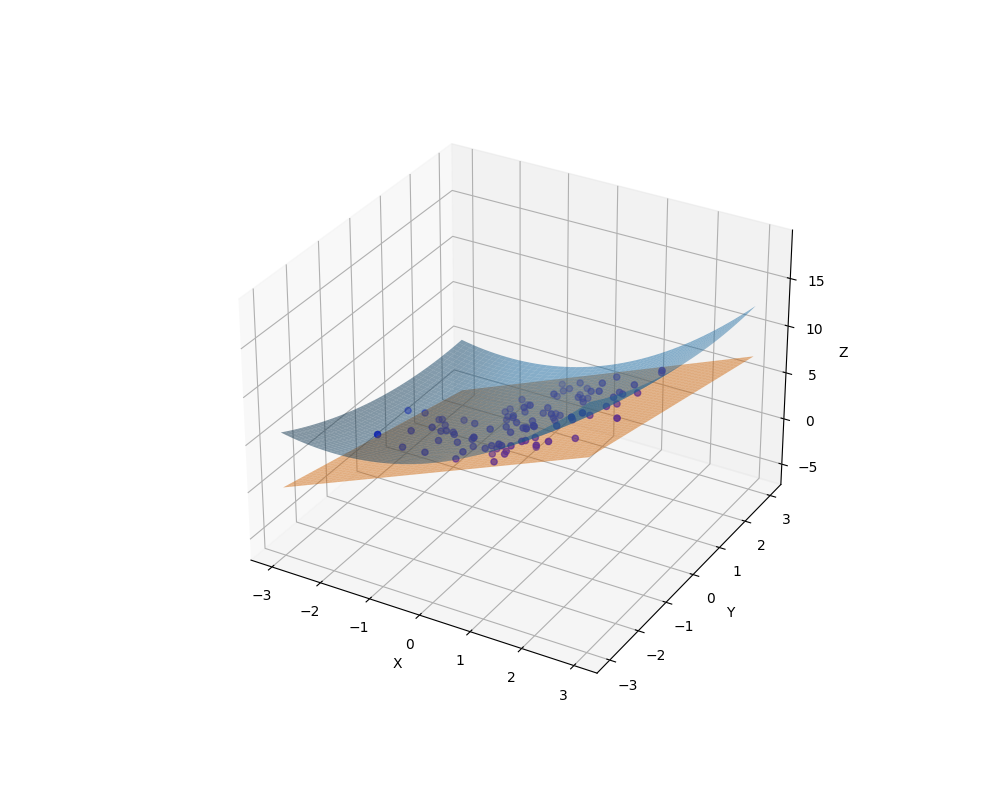

In [36]:
%pip install ipympl



In [41]:
from google.colab import output
output.enable_custom_widget_manager()

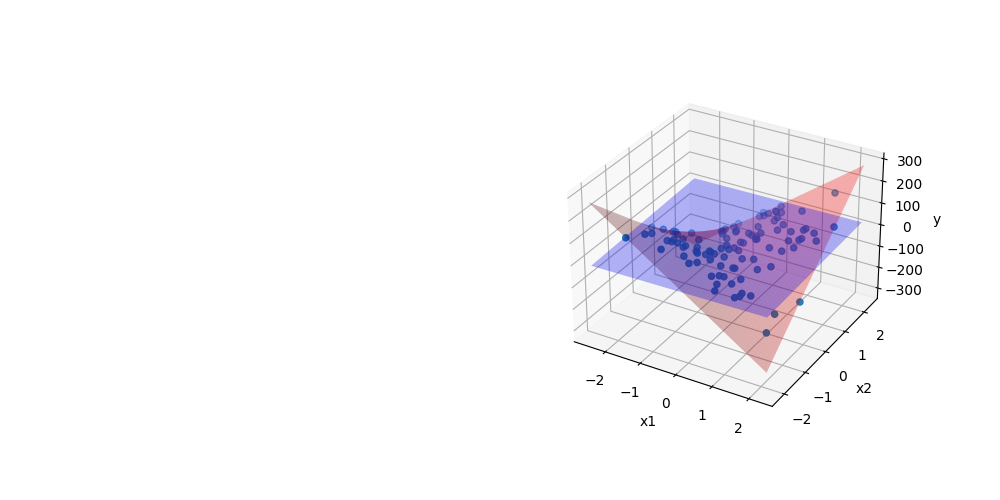

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Generate random data with 2 attributes
np.random.seed(0)
n_samples = 100
x1 = np.random.normal(0, 1, n_samples)
x2 = np.random.normal(0, 1, n_samples)
y = 3*x1 + 2*x2 + 50*x1*x2 + np.random.normal(0, 0.5, n_samples)

# Fit the linear regression model without the nonlinear term
model1 = LinearRegression().fit(np.column_stack((x1, x2)), y)
y_pred1 = model1.predict(np.column_stack((x1, x2)))

# Fit the linear regression model with the nonlinear term
x3 = x1 * x2
model2 = LinearRegression().fit(np.column_stack((x1, x2, x3)), y)
y_pred2 = model2.predict(np.column_stack((x1, x2, x3)))

# Plot the data and the two regression lines
fig = plt.figure(figsize=(10,5))

# 2D plot with and without nonlinear term
#ax1 = fig.add_subplot(121)
#ax1.scatter(x1, y, label="data")
#ax1.plot(x1, y_pred1, color="red", label="linear regression")
#ax1.plot(x1, y_pred2, color="green", label="linear regression with x1*x2")
#ax1.set_xlabel("x1")
#ax1.set_ylabel("y")
#ax1.legend()

# 3D plot with nonlinear term
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x1, x2, y, label="data")
xx1, xx2 = np.meshgrid(np.linspace(x1.min(), x1.max(), 100), np.linspace(x2.min(), x2.max(), 100))
yyl = model1.predict(np.column_stack((xx1.ravel(), xx2.ravel())))
yyn = model2.predict(np.column_stack((xx1.ravel(), xx2.ravel(), xx1.ravel()*xx2.ravel())))
yyl = yyl.reshape(xx1.shape)
yyn = yyn.reshape(xx1.shape)
ax2.plot_surface(xx1, xx2, yyl, alpha=0.3, color='blue')
ax2.plot_surface(xx1, xx2, yyn, alpha=0.3, color='red')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_zlabel("y")

plt.show()


In [40]:
from google.colab import output
output.disable_custom_widget_manager()